Multiple Linear Regression
=========================
f(x) = b + w1X1 + w2X2 + ... + wnXn

w = [w1, w2, ..., wn]
b is a number
X = [X1, X2, ..., Xn]
=> f(x) = b + w.X, where w and X are vectors and . represents dot product

Prepare Data

In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# load csv data
data = np.genfromtxt('../Student_Performance.csv', delimiter=',', skip_header=1)

# drop rows with missing values
data = data[~np.isnan(data).any(axis=1)]

# split data into X and y
X = data[:, :-1]
y = data[:, -1]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cost Function
=============
J(w, b) = 1/2m * sum((f(x) - y)^2)

In [2]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

Gradient Descent
================
w = w - alpha * dJ(w, b)/dw
b = b - alpha * dJ(w, b)/db

where dJ(w, b)/dw = 1/m * sum((f(x) - y) * x)
and dJ(w, b)/db = 1/m * sum(f(x) - y)

In [3]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw


def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b))

    return w, b, J_history

Test with Test Data
=======

w: [ 0.31554911  0.78970622 -0.02716517 -0.00297716]
b: -0.008396176542048377


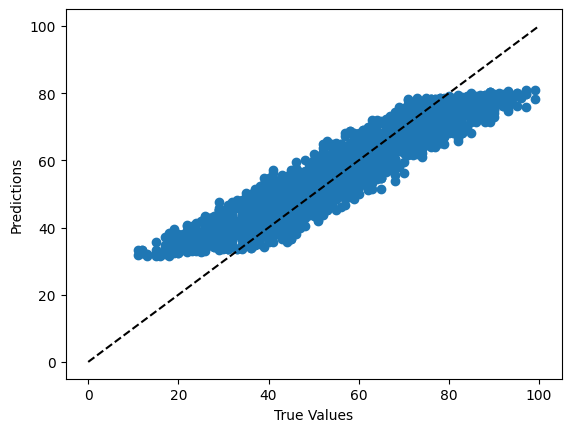

Cost on test data: 32.40383882034203


In [5]:
initial_w = np.zeros(X_train.shape[1])
initial_b = 0

# play around with iterations and alpha
iterations = 200
alpha = 0.0001

w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha,
                                   iterations)

print(f'w: {w}')
print(f'b: {b}')

y_pred = np.dot(X_test, w) + b

# plot y_test vs y_pred and x=y line
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# calculate cost on test data
cost = compute_cost(X_test, y_test, w, b)
print(f'Cost on test data: {cost}')

P.S: some libraries use the "normal equation" to solve for w and b. The normal equation is a closed-form solution that directly computes the parameters that minimize the cost function.

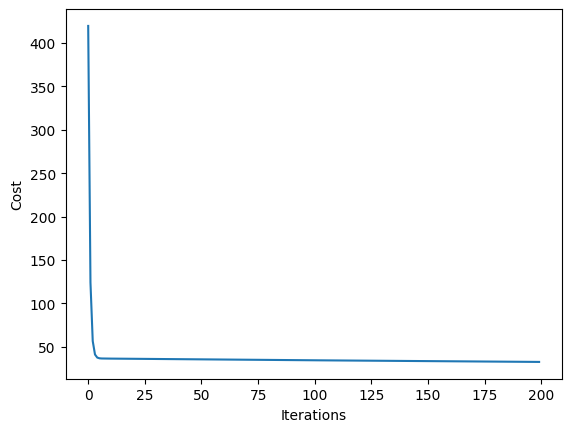

In [6]:
# plot cost vs iterations
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Note that the cost is still decreasing. We will explore more on this later.

Feature Scaling
===============
When the possible values of features differ by orders of magnitude (e.g. one feature ranges from 0 to 1 and another ranges from 1 to 1000), it is likely that the 'w' values will also differ by orders of magnitude.
The contour plot of the cost function will be narrow on the side of the feature with the larger range and wider on the side of the feature with the smaller range.
In this case the algorithm will take longer to converge.

To address this, we can normalize the features to have similar ranges.
Then, the contour plot of the cost function will be more symmetric and the algorithm will converge faster.

Normalization approaches:
1. divide by maximum: x = x / max       ----> 0 <= x <= 1
2. mean normalization: x = (x - mean) / (max - min)     ----> -1 <= x <= 1
3. z-score normalization: x = (x - mean) / std

As a rule of thumb, aim for -1 <= x <= 1

Note: when in doubt, rescale the features.

In [ ]:
def normalize(X):
    n = X.shape[1]
    for i in range(n):
        X[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])
    return X